### BASIC ANALYSIS FOR DATASET WITHOUT TIMESTAMP

In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("joined_impressions.csv")

In [4]:
dfcount=df["contentPosition"].groupby(df["frontPageViewId"]).count()
dfmax=df["contentPosition"].groupby(df["frontPageViewId"]).max()

### ISSUE DATA

In [5]:
count = 0
for i in range(len(dfcount)):
    if dfcount[i] - dfmax[i] == 1:
        count+=1
errorissue=1-count/len(dfcount)
errorissue

0.4021734021241592

### DISTRIBUTION OF THE MAX POSITION PER FRONTPAGE

In [6]:
idx = df.groupby("frontPageViewId")["contentPosition"].transform(max) == df["contentPosition"]
maxpoxition = df[idx]

In [20]:
idx

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9           True
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22          True
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
7231494    False
7231495    False
7231496    False
7231497    False
7231498    False
7231499    False
7231500     True
7231501    False
7231502    False
7231503    False
7231504    False
7231505    False
7231506     True
7231507    False
7231508    False
7231509    False
7231510    False
7231511    False
7231512    False
7231513    False
7231514    False
7231515    False
7231516    False
7231517    False
7231518    False
7231519    False
7231520    False
7231521    Fal

In [7]:
x = Counter(list(maxpoxition["contentPosition"]))
sorted_x = sorted(x.items(), key=lambda x:x[1], reverse=True)
l1=[]
l2=[]
for a,b in sorted_x:
    l1.append("position"+str(a))
    l2.append(b)

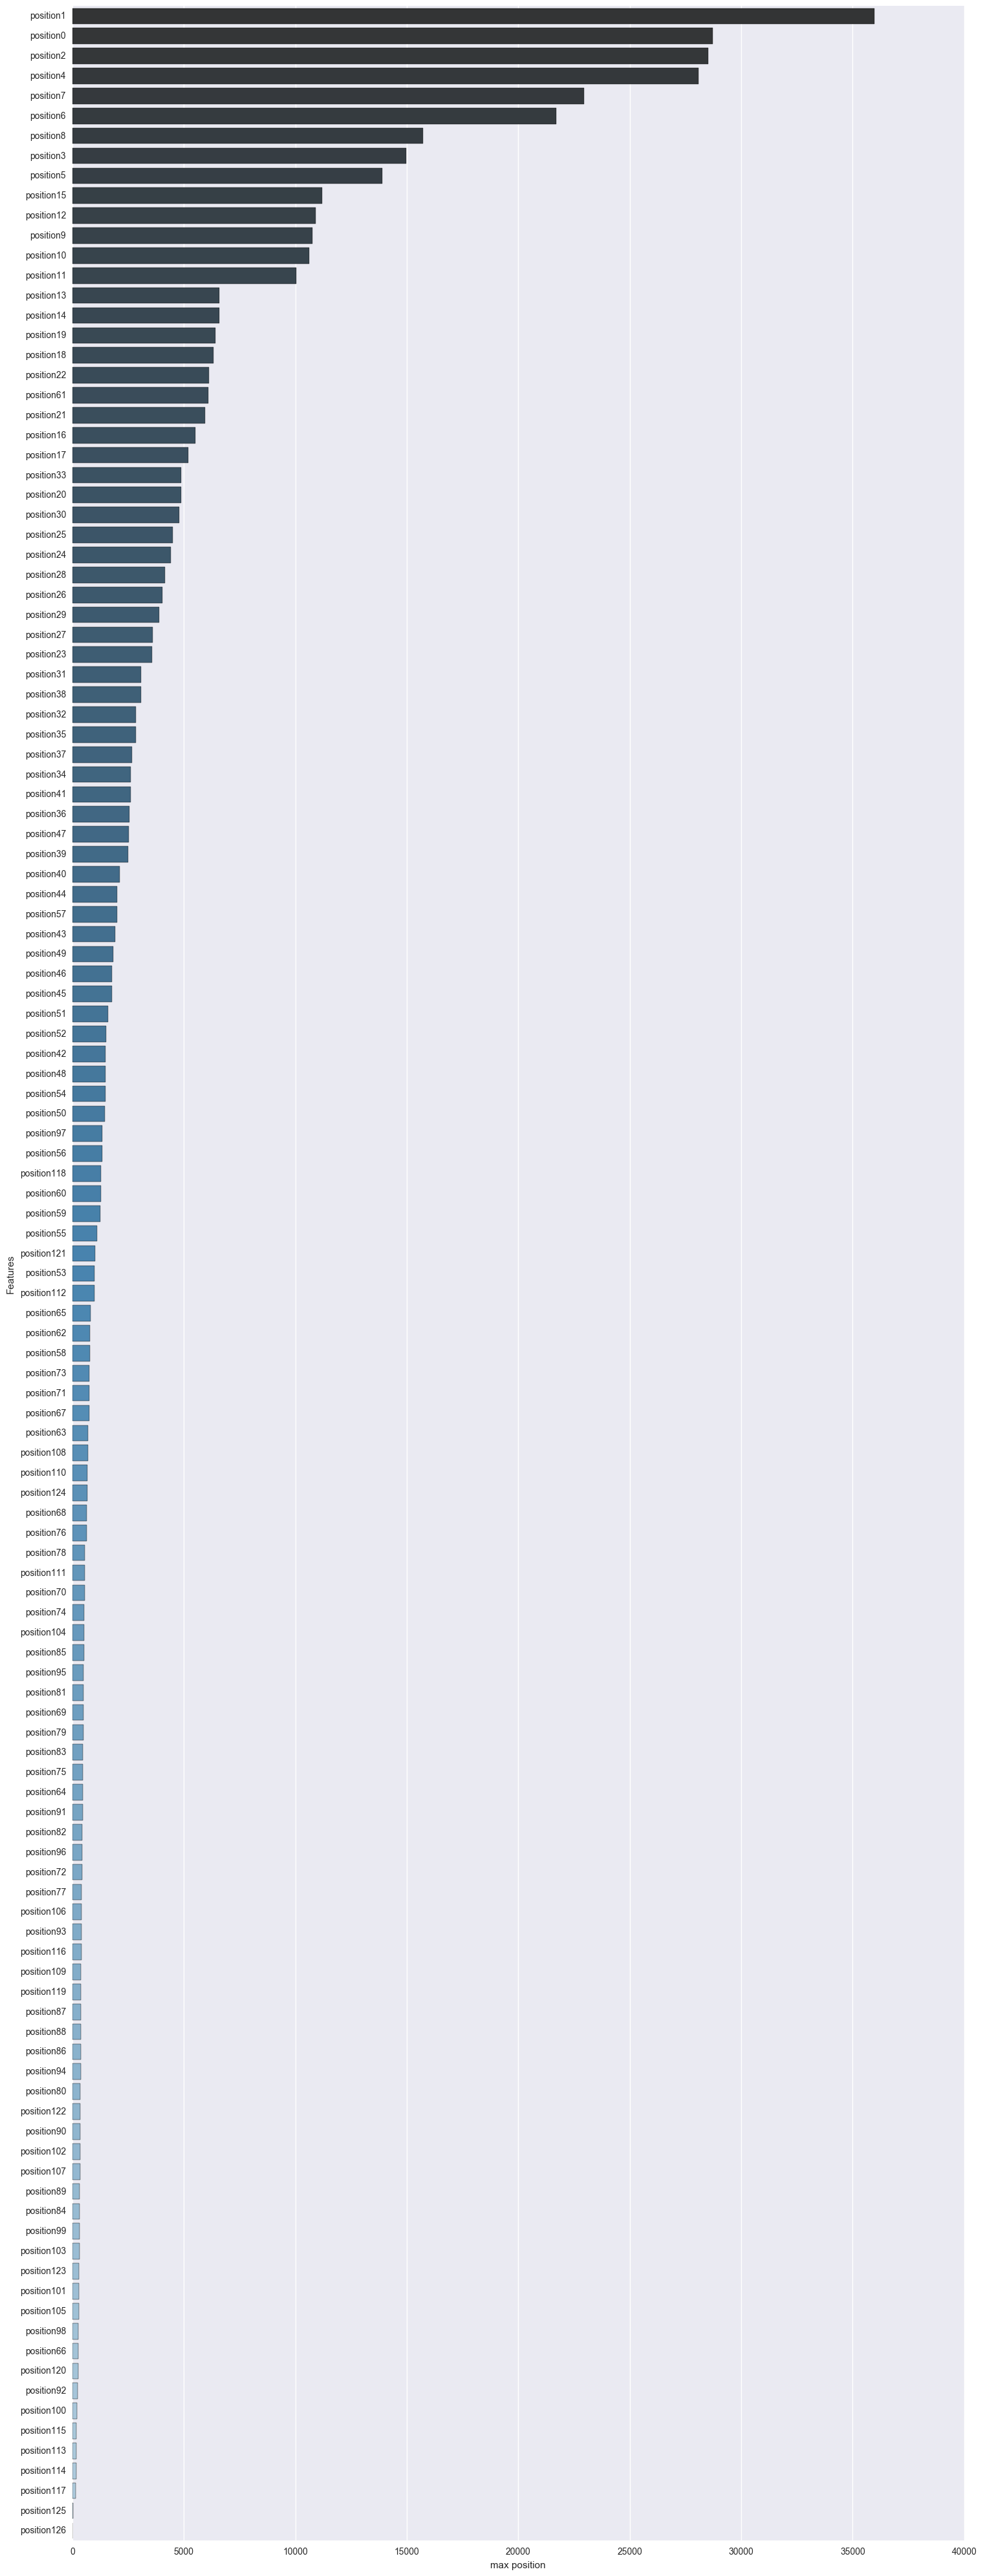

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15.37, 40)
feature_df = pd.DataFrame()
feature_df["Features"] = l1
feature_df["scores"] = l2

sns.barplot(y="Features", x="scores",data=feature_df, palette="Blues_d",ax=ax)
plt.xlabel("max position")
plt.tight_layout()

plt.show()

### CLICK WITH POSITION( THE CODE WITHOUT USING GROUPBY)

In [5]:
frontPage=list(set(df["frontPageViewId"].values.tolist()))
dictcontent={}
newdf=df[df["IsClicked"]==1]
contentlist=list(set(newdf["contentId"].values.tolist()))
for content in contentlist:
    dictcontent[content]=len(newdf[newdf["contentId"]==content])/len(df[df["contentId"]==content])
    

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15.37, 40)
feature_df = pd.DataFrame()
feature_df["Features"] = dictcontent.keys()
feature_df["scores"] = dictcontent.values()

import matplotlib.pyplot as plt
#import plotly.plotly as py
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
#tips = sns.load_dataset(feature_df)

sns.barplot(y="Features", x="scores",data=feature_df, ax=ax)
plt.xlabel("CTR")
plt.tight_layout()
plt.savefig("content_click.png")
plt.show()

### CONTENT WITH POSITION

In [7]:
contentposition = df['contentPosition'].groupby(df['contentId']).mean()

### USE AVE-POSITION TO REPRESENT CONTENT

In [8]:
contentclick = df['IsClicked'].groupby(df['contentId']).mean()
ctr_content_position = pd.DataFrame({'content': contentclick.keys(), 'ctr': list(contentclick), 'ave_position': list(contentposition)})

In [9]:
newctr_content_position = ctr_content_position.sort(columns = 'ave_position')
nonzeroctr=newctr_content_position[newctr_content_position["ctr"] >= 0.0386]
nonzeroctr.sort(columns = 'ctr')

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,ave_position,content,ctr
705,3.842784,lPalk,0.039459
814,3.659365,vRGOw,0.039652
258,55.529619,BaEJG,0.039801
403,3.491801,MyX5o,0.040402
597,3.865348,dKazq,0.040500
854,7.301066,x6XzV,0.041627
821,6.071677,vRyJV,0.041782
855,2.435964,x6dAR,0.042888
777,9.261584,q9Evw,0.043398
304,52.227273,GWqom,0.045455


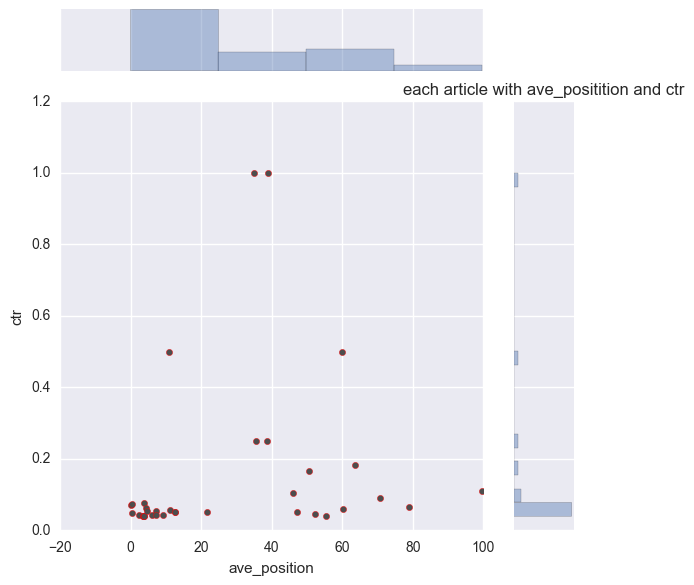

In [10]:
g=sns.JointGrid(x='ave_position',y='ctr',data = nonzeroctr,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("each article with ave_positition and ctr")
#plt.savefig("ctr_content_position_biplot.png")
plt.show()

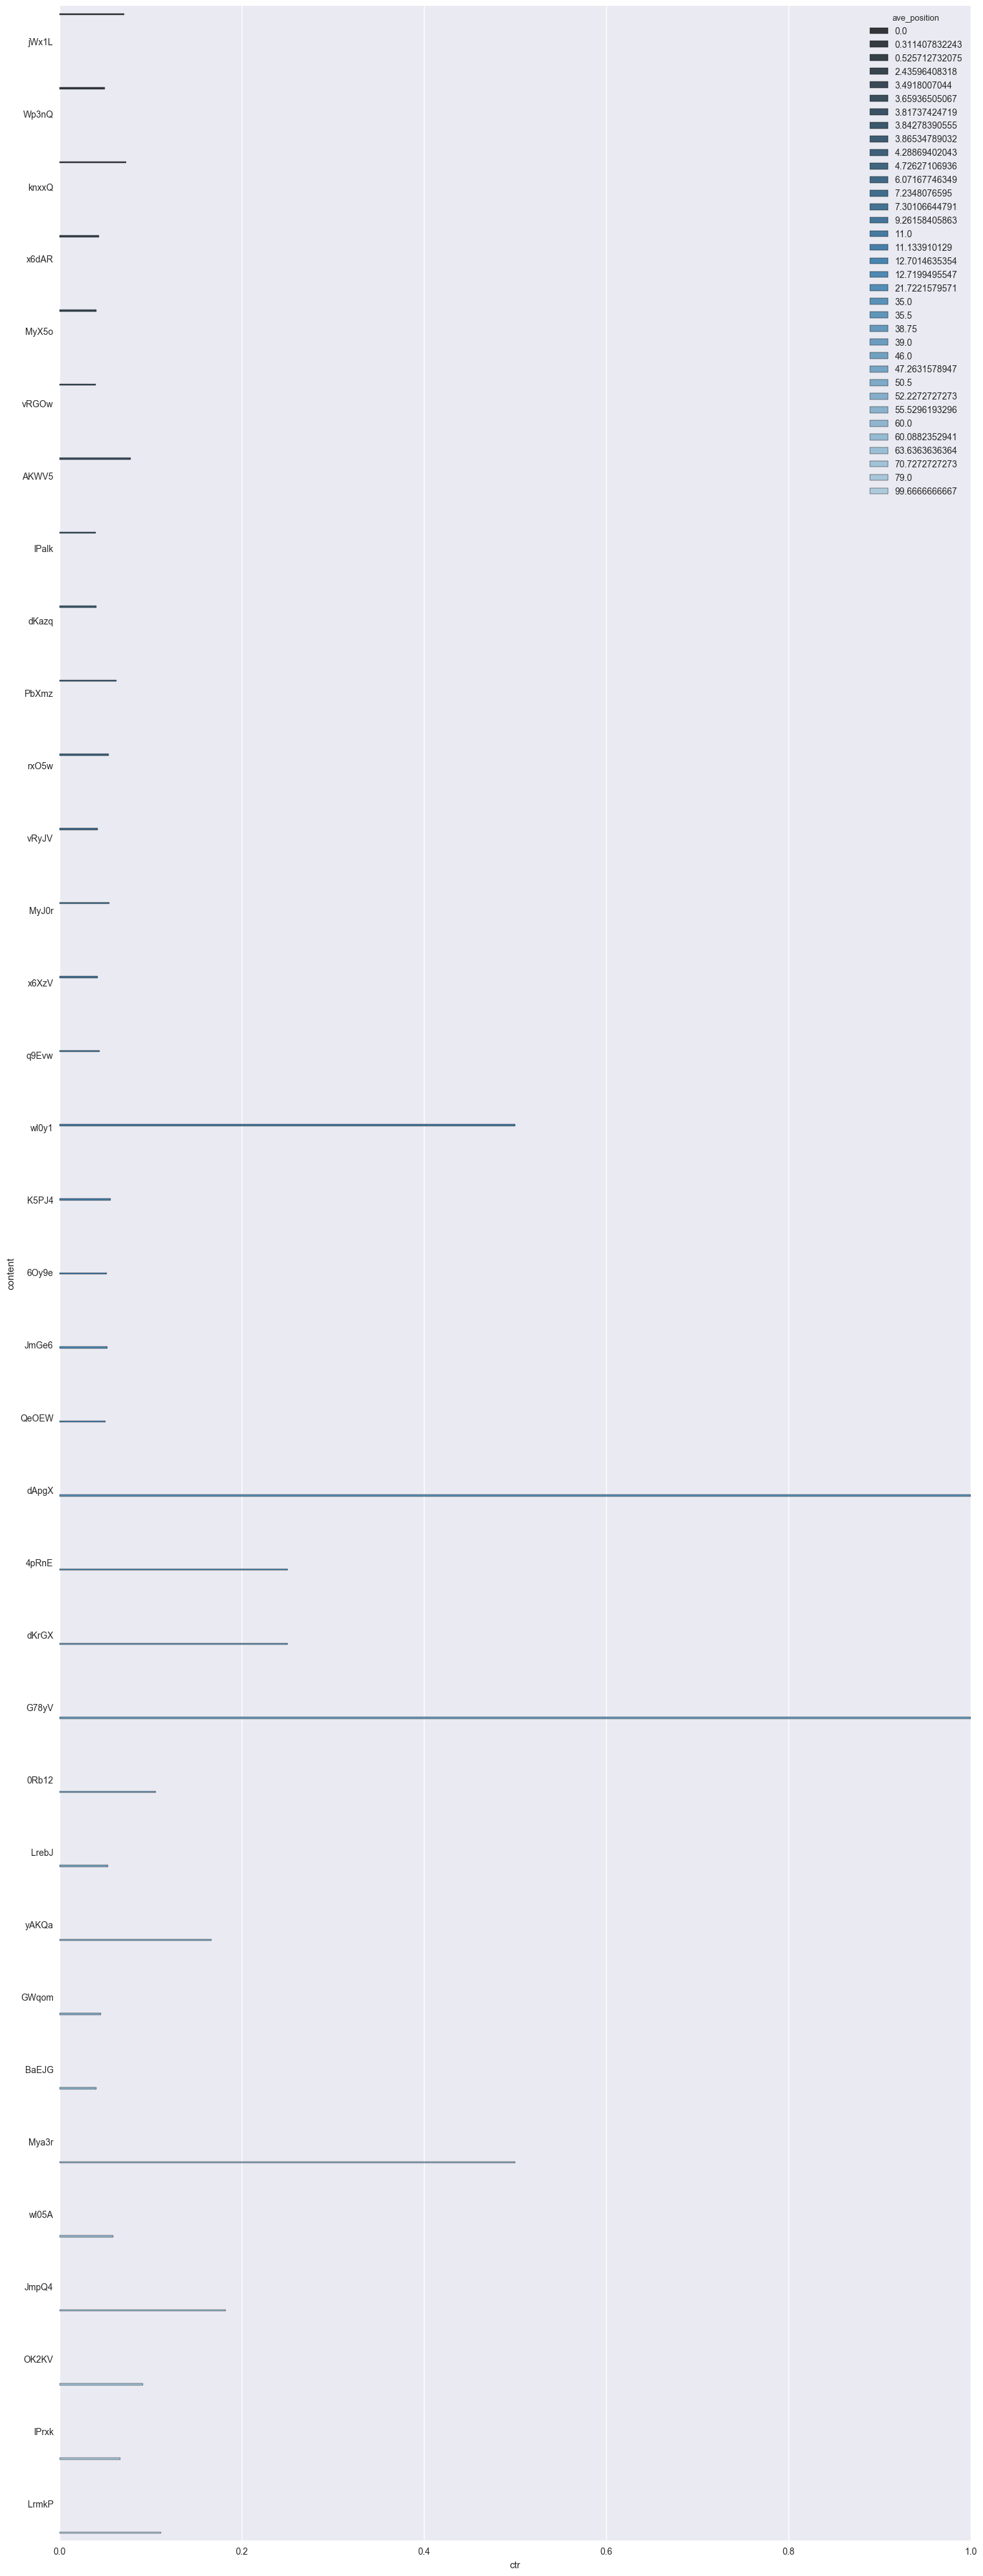

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(15.37, 40)
sns.barplot(y="content", x="ctr",hue = "ave_position", data = nonzeroctr,palette="Blues_d", ax=ax)
plt.xlabel("ctr")
plt.tight_layout()
#plt.savefig("ctr_content_position.png")
plt.show()

### ARTICLE WITH RELEVANT POSITION INFORMATION

In [13]:
dfmin=df["contentPosition"].groupby(df["contentId"]).min()
df['contentPosition'].groupby(df['contentId']).nunique()
ctr_content_thenumberposition = pd.DataFrame({'content': contentclick.keys(), 'ctr': list(contentclick), 'impression': list(df['contentPosition'].groupby(df['contentId']).count()), 'numberposition': list(df['contentPosition'].groupby(df['contentId']).nunique()), 'ave_position': list(contentposition), 'minposition': list(dfmin)})

In [14]:
ctr_content_thenumberposition = ctr_content_thenumberposition.sort(columns = "ctr")
np.mean(list(ctr_content_thenumberposition["impression"].values.tolist()))

/Users/XiHUANG/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


8026.1087680355158

In [15]:
ctr_content_thenumberposition = ctr_content_thenumberposition[ctr_content_thenumberposition["impression"] > 8026]

### MINPOSITION PER ARTICLE WITH LARGER IMPRESSION & CTR

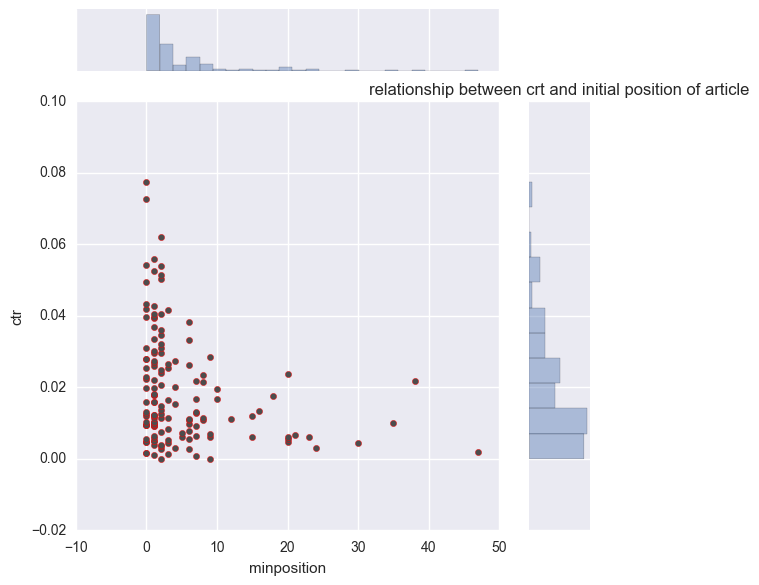

In [17]:
g=sns.JointGrid(x='minposition',y='ctr',data = ctr_content_thenumberposition,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("relationship between crt and initial position of article")
#plt.savefig("ctr_initialposition_biplot.png")
plt.show()

### AVE_POSITION PER ARTICLE AND CTR

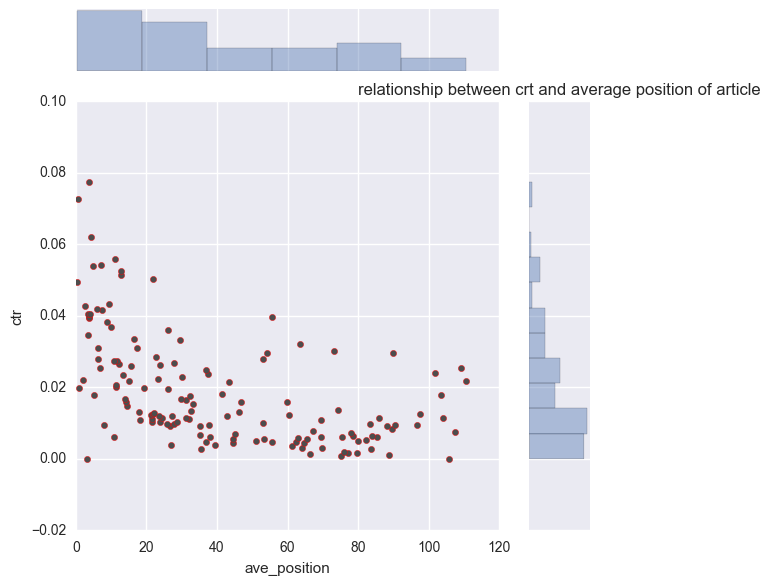

In [18]:
g=sns.JointGrid(x='ave_position',y='ctr',data = ctr_content_thenumberposition,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("relationship between crt and average position of article")
#plt.savefig("ctr_averageposition_biplot.png")
plt.show()

### THE NUMBER OF IMPRESSION AND CTR

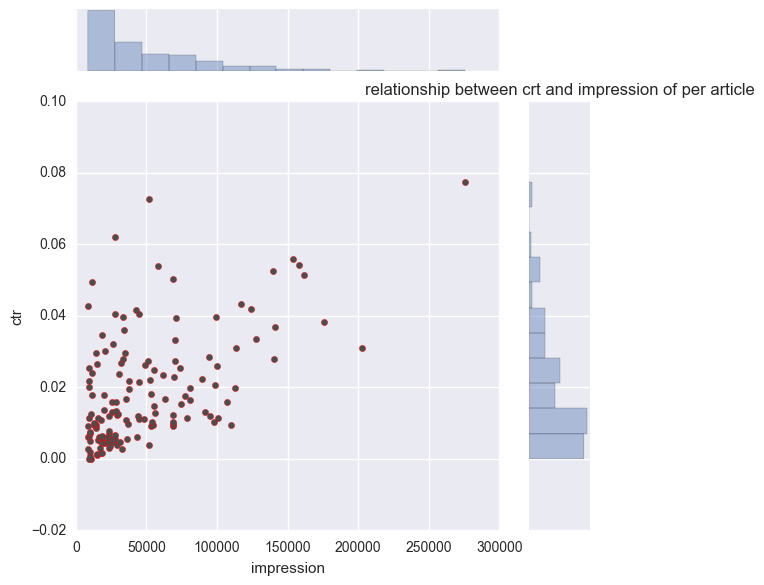

In [20]:
g=sns.JointGrid(x='impression',y='ctr',data = ctr_content_thenumberposition,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("relationship between crt and impression of per article")
#plt.savefig("ctr_impression.png")
plt.show()

### THE NUMBER OF IMPRESSION AND CTR

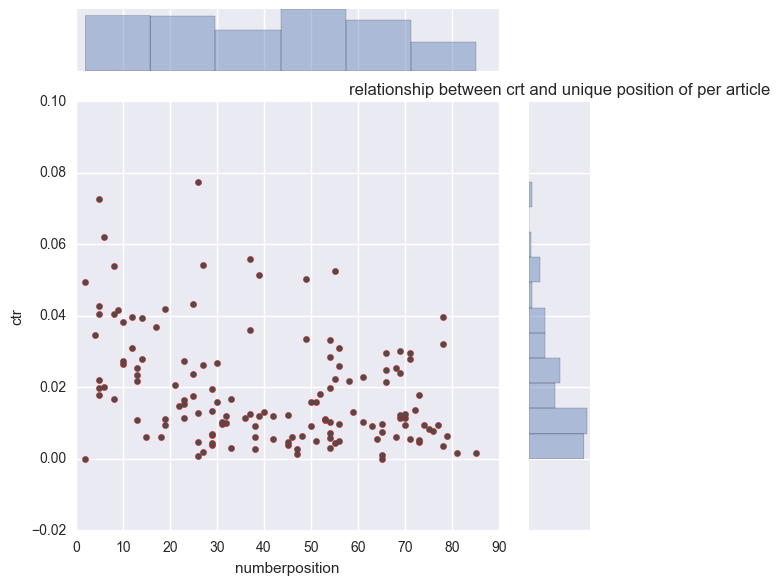

In [21]:
g=sns.JointGrid(x='numberposition',y='ctr',data = ctr_content_thenumberposition,space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("relationship between crt and unique position of per article")
#plt.savefig("ctr_uniqueposition.png")
plt.show()

### picture between position and break news

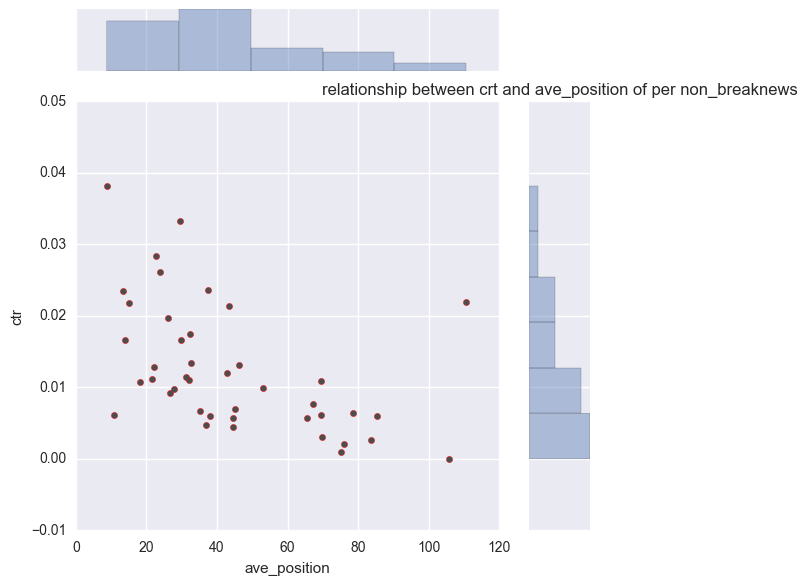

In [22]:
ctr_content_thenumberposition.minposition.describe()
ctr_content_thenumberposition[ctr_content_thenumberposition["minposition"] > 5]
g=sns.JointGrid(x='ave_position',y='ctr',data = ctr_content_thenumberposition[ctr_content_thenumberposition["minposition"] > 5],space=0.5,ratio=5)
g=g.plot_joint(plt.scatter,color='.3',edgecolor='r')
g=g.plot_marginals(sns.distplot,kde=False)
plt.title("relationship between crt and ave_position of per non_breaknews")
#plt.savefig("ctr_aveposition_non_breaknews.png")
plt.show()